In [1]:
import numpy as np
from meshes.truss_like_mesh import truss_like_cross
from pybandgap.set_structure import fine_irreducible_brillouin_zone, map_prop, Material, Props
from pybandgap.plot_mesh import plot_IBZ, plot_structure_materials_and_diameters
from pybandgap.bandgap import bandgap
from pybandgap.mass_and_stiffness_matrix import matrix_and_stiffness_matrix, multiple_materials_matrix

msh, *_ = truss_like_cross()

In [2]:
elements, condition = fine_irreducible_brillouin_zone(msh)

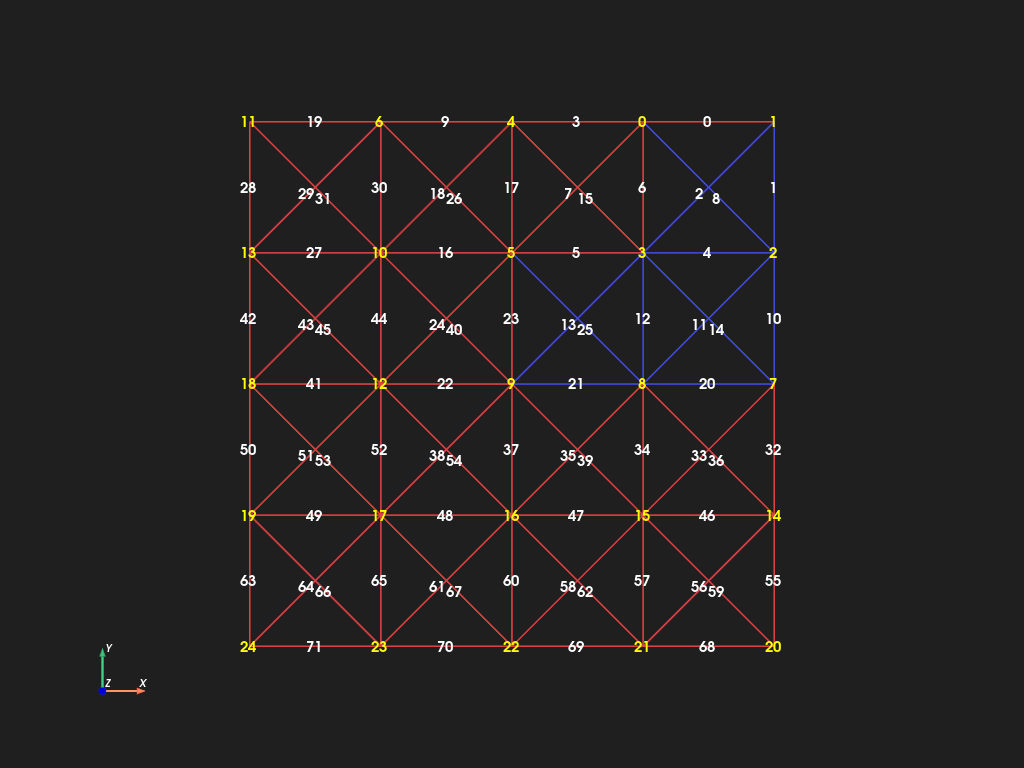

In [3]:
plot_IBZ(msh, elements)

In [4]:
elements_over = [1, 2, 4, 8]

In [5]:
aluminio = Material('aluminio',young_modulus=70e9, poisson_ratio=0.33, density=2.7e3)
tungsteno = Material('tungsteno',young_modulus=411e9, poisson_ratio=0.28, density=19.3e3)

In [6]:
material_elements = np.array([
    tungsteno if i in elements_over else aluminio
    for i in elements])#

diameters_elements = np.array([
    0.008 if i in np.append(elements_over, 13) else 0.004
    for i in elements])

In [7]:
material  = map_prop(msh, material_elements)
diameters  = map_prop(msh, diameters_elements)

In [8]:
plot_structure_materials_and_diameters(msh, material, diameters)

In [ ]:
mass_matrix, stiffness_matrix = multiple_materials_matrix(msh, material, diameters_map=diameters)

AttributeError: 'list' object has no attribute 'young_modulus'

In [ ]:
_ = bandgap(3, msh, mass_matrix, stiffness_matrix, N_eig = 5, plot= True, NINT=50)